In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import morphology
from skimage.morphology import binary_erosion

from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

2025-04-03 13:25:45.678330: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 13:25:45.684289: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 13:25:45.707925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-03 13:25:45.753812: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-03 13:25:45.763004: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-03 13:25:47.384652: W tensorflow/compiler/tf2tensorrt/utils/p

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [22]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [38]:
# Normalize training data. Use lambda funktion to set point to 255 or 0. Threshold eq 57
threshold = 0.4
x_train_norm = np.where(x_train > threshold, 1, 0) # this works 
# use dilation to fill in the holes and make more linear
x_train_dil = np.zeros(x_train.shape)
for i in range(len(x_train)):
    x_train_dil[i] = morphology.binary_dilation(x_train_norm[i], morphology.disk(1))
# use erosion to remove the noise
x_train_ero = np.zeros(x_train.shape)
for i in range(len(x_train_dil)):
    x_train_ero[i] = binary_erosion(x_train_dil[i], morphology.disk(1))

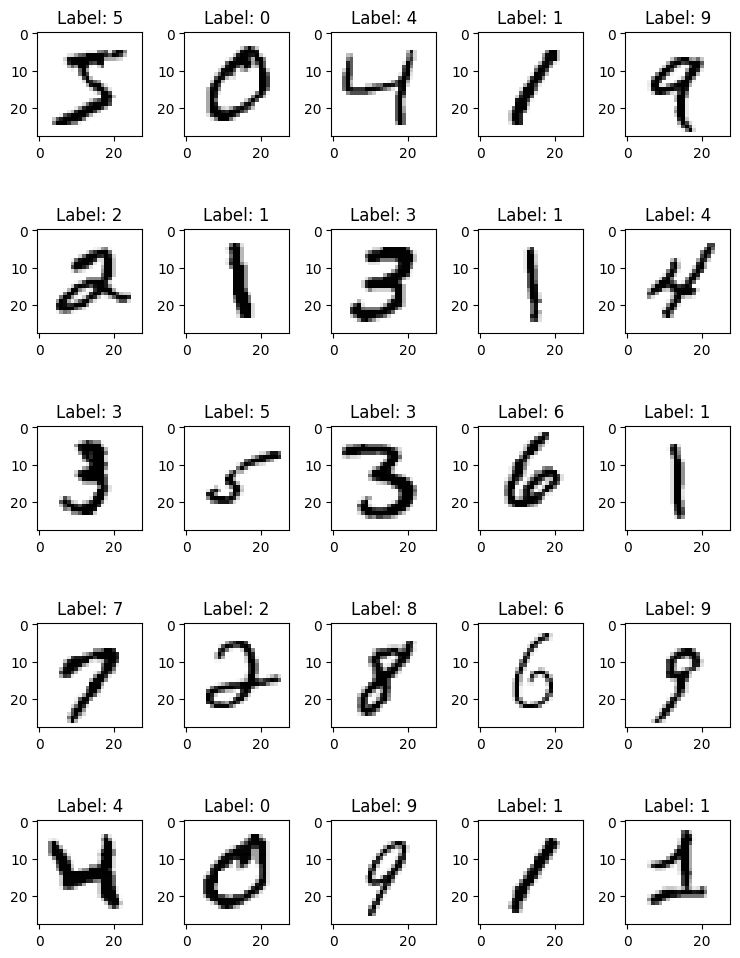

In [42]:
num = 25
images = x_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [43]:
# Create a simple neural network model to classify the images
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(x_train_ero, y_train, epochs=5, batch_size=32, validation_split=0.2)
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
# Predict the labels for the test set
predictions = model.predict(x_test)
# Print the predicted labels for the first 10 images
predicted_labels = np.argmax(predictions, axis=1)
print('Predicted labels:', predicted_labels[:10])

/usr/local/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


2025-04-03 14:10:09.265111: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8551 - loss: 0.4929 - val_accuracy: 0.9495 - val_loss: 0.1668
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9571 - loss: 0.1424 - val_accuracy: 0.9584 - val_loss: 0.1358
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9709 - loss: 0.0968 - val_accuracy: 0.9588 - val_loss: 0.1323
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9790 - loss: 0.0699 - val_accuracy: 0.9636 - val_loss: 0.1212
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9839 - loss: 0.0523 - val_accuracy: 0.9676 - val_loss: 0.1081
313/313 - 1s - 4ms/step - accuracy: 0.9768 - loss: 0.0782

Test accuracy: 0.9768000245094299
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted labels: [7 2 1 0 4 1 4 9 6 9]


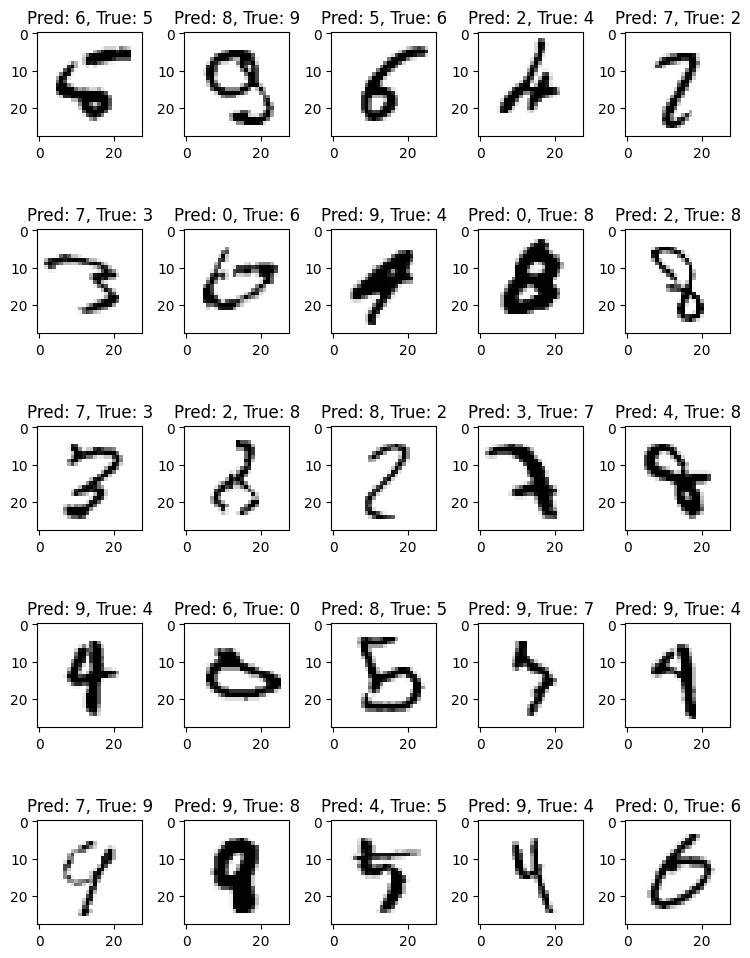

In [44]:
# Print first 25 grong predictions and their labels
wrong_predictions = np.where(predicted_labels != y_test)[0][:25]
wrong_images = x_test[wrong_predictions]
wrong_labels = predicted_labels[wrong_predictions]
# Plot wrong predictions
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(len(wrong_predictions)):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(wrong_images[i], cmap='gray_r')
    ax.set_title('Pred: {}, True: {}'.format(wrong_labels[i], y_test[wrong_predictions[i]]))
plt.tight_layout()
plt.show()

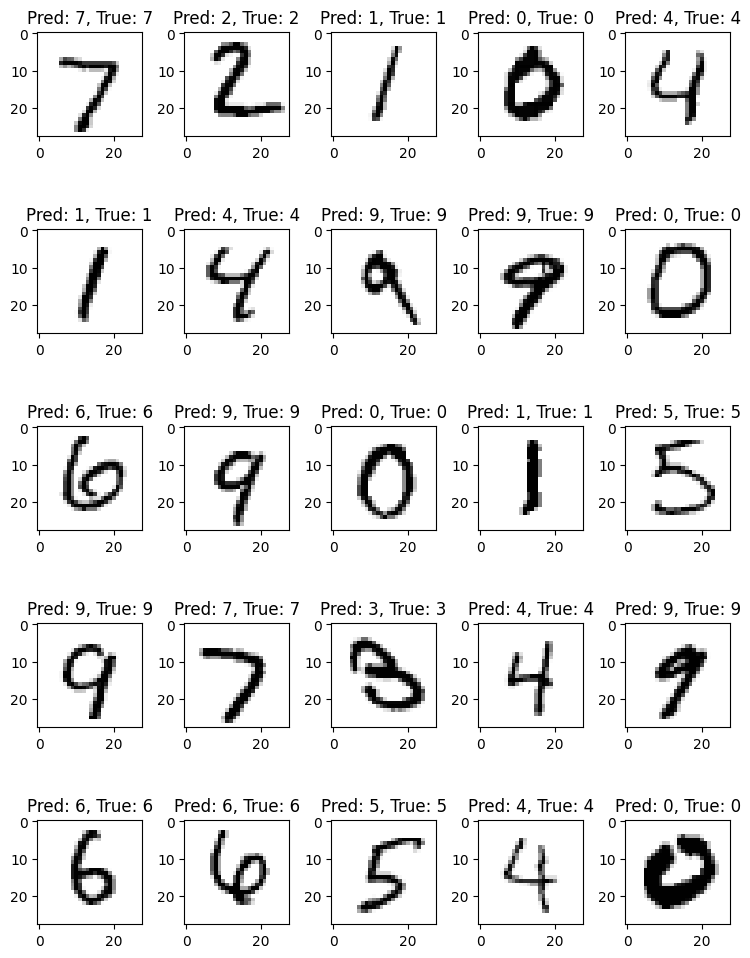

In [45]:
# Print first 25 correct predictions and their labels
correct_predictions = np.where(predicted_labels == y_test)[0][:25]
correct_images = x_test[correct_predictions]
correct_labels = predicted_labels[correct_predictions]
# Plot correct predictions
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(len(correct_predictions)):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(correct_images[i], cmap='gray_r')
    ax.set_title('Pred: {}, True: {}'.format(correct_labels[i], y_test[correct_predictions[i]]))
plt.tight_layout()
plt.show()